In [2]:
import librosa
import numpy as np
import matplotlib.pylab as plt
y, sr = librosa.load("speech1.wav") # Loading the Audio File

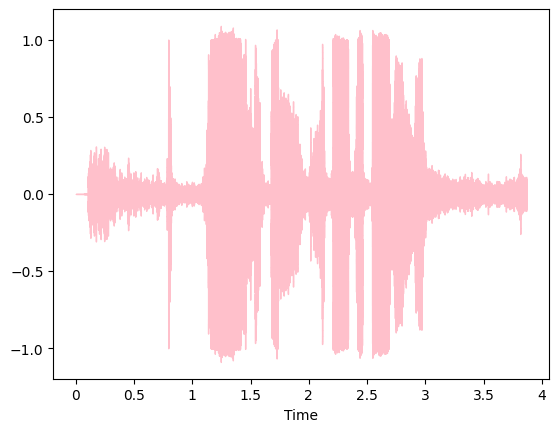

In [3]:
librosa.display.waveshow(y,color='pink') #Displaying the Audio Track

In [4]:
from IPython.display import Audio
Audio(data=y, rate=sr) # Displaying the Audio 

In [5]:
#A1. Use librosa.effects.trim() to remove the silence parts of speech from beginning andend of your recorded signal. 
#Listen to the new signal and perceptually compare the audio withoriginal.
# Trim the beginning and ending silence giving the different values to learn the effect
yt, index = librosa.effects.trim(y,top_db=10)
yt1, index1 = librosa.effects.trim(y,top_db=20)
yt2, index1 = librosa.effects.trim(y,top_db=30)
yt3, index1 = librosa.effects.trim(y,top_db=40)

In [6]:
print(librosa.get_duration(y=y))
print(librosa.get_duration(y=yt))
print(librosa.get_duration(y=yt1))
print(librosa.get_duration(y=yt2))
print(librosa.get_duration(y=yt3))

3.872018140589569
1.8808163265306121
2.9024943310657596
3.779138321995465
3.8023582766439907


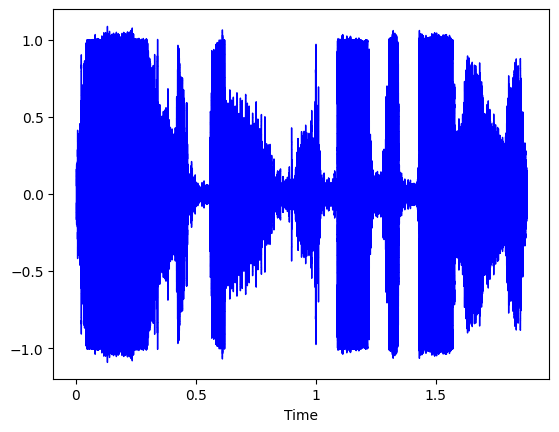

In [7]:
librosa.display.waveshow(yt,color='blue')

Text(139.22222222222223, 0.5, 'Amplitude')

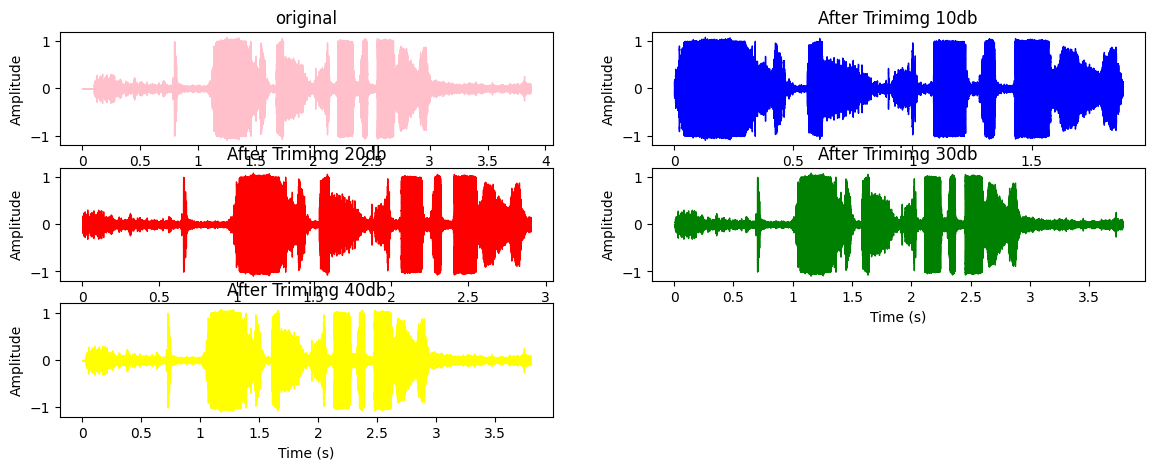

In [8]:
# visulising the signal difference of original signal with respect to the trimmed signal
plt.figure(figsize=(14, 5))
plt.subplot(3,2,1)
librosa.display.waveshow(y, color= "pink")
plt.title('original')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3,2,2)
librosa.display.waveshow(yt,color='blue')
plt.title("After Trimimg 10db")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3,2,3)
librosa.display.waveshow(yt1,color='red')
plt.title("After Trimimg 20db")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3,2,4)
librosa.display.waveshow(yt2,color='green')
plt.title("After Trimimg 30db")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3,2,5)
librosa.display.waveshow(yt3,color='yellow')
plt.title("After Trimimg 40db")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

In [17]:
Audio(data=yt,rate=sr)

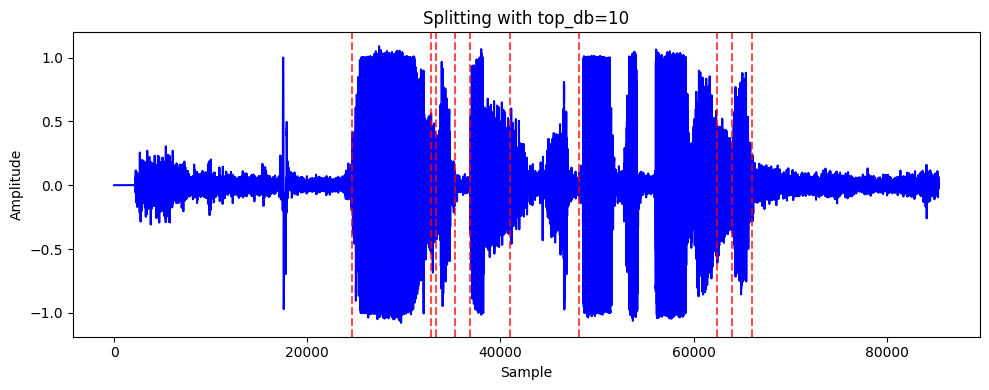

In [13]:
#A2. Use librosa.effects.split() to split the recorded speech with detected silences.
#Play around with the top_db parameter and see the effects of split.
#Listen to the generated signals andobserve the split quality.
intervals = librosa.effects.split(y,top_db=10)
# Plot the original signal and the silent intervals
plt.figure(figsize=(10, 4))
plt.plot(y, color='b')
for i in intervals:
    plt.axvline(i[0], color='r', linestyle='--', alpha=0.7)
    plt.axvline(i[1], color='r', linestyle='--', alpha=0.7)
plt.title(f"Splitting with top_db={10}")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

In [14]:
intervals
#starting and ending intervals of the speech detected with silence and nonsilence part

array([[24576, 32768],
       [33280, 35328],
       [36864, 40960],
       [48128, 62464],
       [64000, 66048]])

In [15]:
import IPython.display as ipd
#Listen to the generated signals after splitting
print(f"Split Audio with top_db={10}:")
for i, j in enumerate(intervals):
 split_audio = y[j[0]:j[1]]
 ipd.display(ipd.Audio(split_audio, rate=sr))
# Limit the number of intervals to play for clarity
 if i >= 5:
            break

Split Audio with top_db=10:


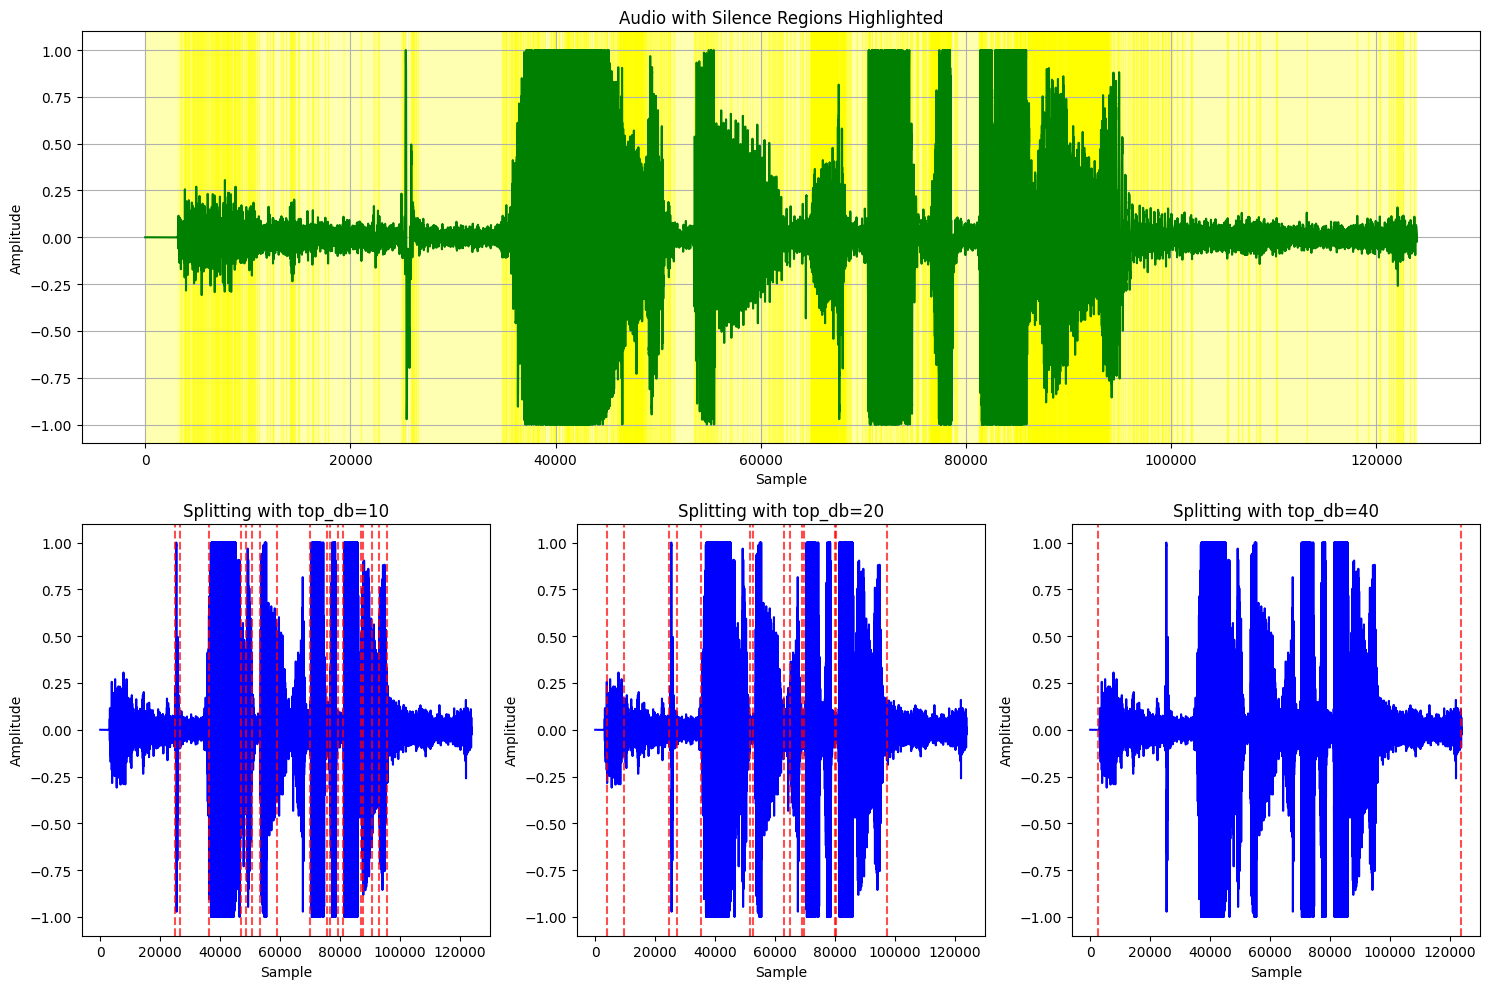

In [28]:
# Define a function to calculate the energy of a given signal
def calculate_energy(signal):
    squared_signal = np.square(signal)  # Calculate the squared signal
    energy = np.sum(squared_signal)  # Calculate the total energy by summing the squared samples
    return energy

# Function to detect silence based on energy threshold
def detect_silence(signal, threshold):
    energy = calculate_energy(signal)
    if energy < threshold:  # If the energy is below the threshold, consider it as silence
        return True
    else:
        return False

# Load the audio file
file_path = "speech1.wav"
audio_signal, sample_rate = librosa.load(file_path, sr=None)

# Define an energy threshold for silence detection
energy_threshold = 0.01  # Adjust this threshold as needed

# Detect silence regions in the audio
silence_regions = []
current_region = []
for i, sample in enumerate(audio_signal):
    if detect_silence(sample, energy_threshold):
        current_region.append(i)
    elif current_region:
        silence_regions.append(current_region)
        current_region = []
if current_region:
    silence_regions.append(current_region)

# Perform splitting with different top_db values
top_db_values = [10, 20, 40]  # You can adjust these values as needed

# Plot the waveform with silence regions highlighted and split intervals overlaid
plt.figure(figsize=(15, 10))

# Plot the waveform with silence regions highlighted
plt.subplot(2, 1, 1)
plt.plot(audio_signal, color='green')
for region in silence_regions:
    plt.axvspan(region[0], region[-1], color='yellow', alpha=0.3)
plt.title("Audio with Silence Regions Highlighted")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)

# Plot the waveform with split intervals overlaid
for i, top_db in enumerate(top_db_values):
    plt.subplot(2, len(top_db_values), len(top_db_values) + i + 1)
    split_audio_intervals = librosa.effects.split(audio_signal, top_db=top_db)
    plt.plot(audio_signal, color='b')
    for interval in split_audio_intervals:
        plt.axvline(interval[0], color='r', linestyle='--', alpha=0.7)
        plt.axvline(interval[1], color='r', linestyle='--', alpha=0.7)
    plt.title(f"Splitting with top_db={top_db}")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.tight_layout()

plt.show()